# Crunchbase Project: Exploratory Data Analysis

## Part 1: Investment Analysis

#### In this notebook I will be exploring the data and trying to answer questions that came up in the initial run through of the data during wrangling. 

### The EDA for the project was broken up into three main sections.
1. Investor Analysis
2. Investment Analysis
3. Category Analysis

As there is a wide range of data it took a large amount of exploratory data analysis (EDA) to really get a feel for the entirety of the data and the important features.  We split the EDA into 3 separate notebooks to help with organization.  The notebook provided includes the analysis of the features finally selected.  This being my first big project I did a lot of extra exploration both to be sure that I got everything from the data and to just practice different visualization and analysis tools learned in the course.

## Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from datetime import datetime
import glob as glob

In [3]:
# Investment Companies
crunchbase_df = pd.read_csv('data/processed/crunchbase_data.csv').drop(columns=['Unnamed: 0'])

# Company Data
companies = pd.read_csv('data/clean/companies.csv')

# Investment Round Data
investment_rounds = pd.read_csv('data/interim/investment_rounds.csv', low_memory=False)

In [4]:
crunchbase_df.head(3)

,company_id,company_permalink,funding_round_permalink,year,quarter,tenure_quarters_overall,tenure_quarters_round,short_description,company_category_list,company_category_count,...,investor_ESP,investor_ISR,investor_CHE,investor_JPN,investor_IND,investor_HKG,investor_SGP,investor_CHL,investor_SWE,fund_within_year
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,2015,1,0,0,Fame is a live video entertainment platform th...,Media,1.0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,2015,2,1,1,Fame is a live video entertainment platform th...,Media,1.0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,2015,3,2,2,Fame is a live video entertainment platform th...,Media,1.0,...,0,0,0,0,0,0,0,0,0,0.0


# Investments Analysis

<strong> Exploration 1:</strong> Do Different Rounds Raise Different Amounts?
- <strong> Seed Vs Angel </strong>
- <strong> Venture Rounds
- <strong> Other Funding
- <strong> Post IPO Funding

<strong> Exploration 2:</strong> Do Different Round Types Have Different Tenures?
- <strong> Seed Vs Angel</strong>
    - Company Tenure When Round Was Raised
    - Length Of The Round
- <strong> Venture Rounds</strong>
    -  Company Tenure When Round Was Raised
    -  Length Of The Round

In [5]:
# Get important columns from the investment_rounds dataset and merge with companies dataset
investment_cols = ['company_permalink','funding_round_type','funding_round_code',\
                   'funded_at','raised_amount_usd','funding_total_usd','funding_rounds']
investment_data = investment_rounds.merge(companies, left_on='company_permalink', right_on='permalink')[investment_cols]

In [6]:
investment_data.shape

(212809, 7)

# Exploration 1: Do Different Rounds Raise Different Amounts?

As there are a wide range of funding round types the comparisons have been broken up into the following sections.
- Seed Vs Angel
- Venture Rounds (A, B, C, D, etc..)
- Other Funding (Debt Financing, Private Equity, Crowdsourcing, etc..)
- Post IPO Funding

In [16]:
#Bootstrap Sampling
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#Repeat bootstrap x amount of times based on size
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

In [17]:
def bootstrap_plot(title, xlabel, round_list, data, variable, code):
    """Plot Bootstrap Distributions For Specified Rounds"""
    legend = [x.capitalize() for x in round_list]
    file_name = title.lower().replace(' ','_')
    
    # Plot KDE plot of bootstrap Excess Readmission Ratio based on size
    _ = plt.figure(figsize=(14,7))
    
    # Pull, Bootstrap, and Plot for Rounds We Need.
    for round_name in round_list:
        round_values = data[data[code] == round_name]
        bs_reps = draw_bs_reps(round_values[variable].dropna(), np.mean, size=1000)
        _ = sns.kdeplot(bs_reps, shade=True)
    _ = plt.title(title, size=14)
    _ = plt.xlabel(xlabel)
    _ = plt.savefig('figures/eda/investments/' + file_name + '.png')
    _ = plt.legend(legend)

## a) Seed Vs Angel

## Bootstrap Confidence Intervals:  Angel vs Seed

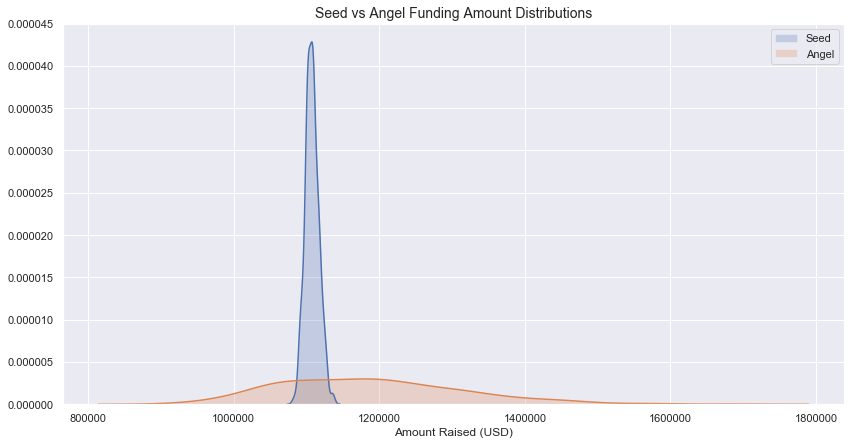

In [18]:
#Define Values
angel_seed_list = ['seed', 'angel']

#Plot
bootstrap_plot('Seed vs Angel Funding Amount Distributions', 'Amount Raised (USD)', angel_seed_list, investment_data, 'raised_amount_usd', 'funding_round_type')

### Observations:
- <strong>Seed Investments</strong> have much <strong>lower variance</strong> than Angel Investments
- <strong>Angel Investments</strong> vary greatly but <strong>overall are higher than seeds</strong>.
- <strong>Seeds Investments</strong> are typically <strong>around $1.1 Million</strong>.

## b) Funding Rounds

## Bootstrap Confidence Intervals:  Venture Rounds

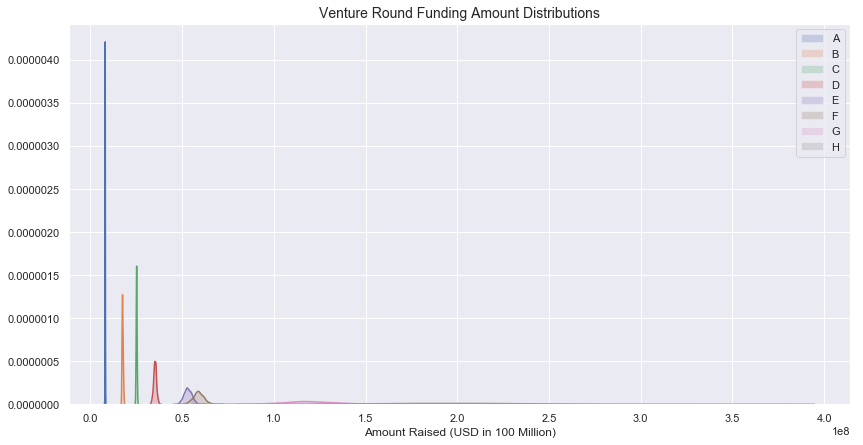

In [19]:
# Venture Round Names List
venture_round_list = ['A','B','C','D','E','F','G','H']

#Plot
bootstrap_plot('Venture Round Funding Amount Distributions','Amount Raised (USD in 100 Million)', venture_round_list, investment_data, 'raised_amount_usd', 'funding_round_code')

### Observations:
- <strong>Funding Amount Increases</strong> with each round.
- <strong>Variance Increases</strong> with each round

## c) Post IPO

## Bootstrap Confidence Intervals:  Post IPO

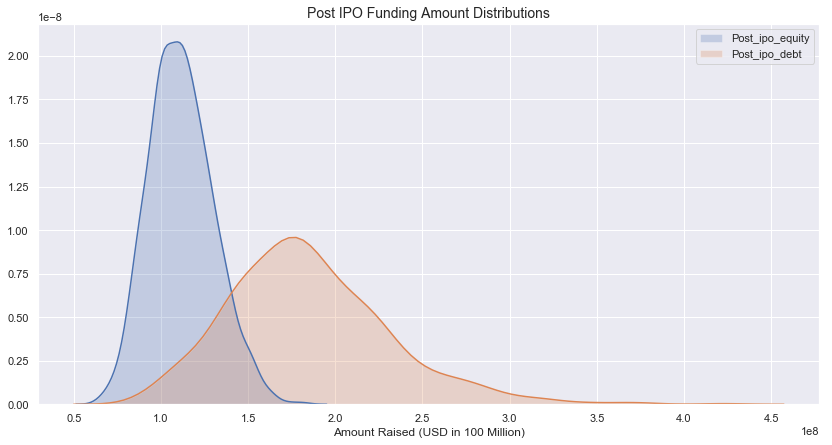

In [20]:
# Post IPO Name List
post_ipo_list = ['post_ipo_equity','post_ipo_debt']

# Plot
bootstrap_plot('Post IPO Funding Amount Distributions','Amount Raised (USD in 100 Million)', post_ipo_list, investment_data, 'raised_amount_usd', 'funding_round_type')

### Observations:
- <strong>Post IPO Debt</strong> typically <strong>Raised More</strong> than Post IPO Equity
- <strong>Post IPO Debt</strong> has a <strong>Higher Variance</strong> than Post IPO Equity

## d) Other Funding Types

Broken into the following sections:
- Debt vs Equity
- Product Crowdfunding vs Equity Crowdfunding
- Other

## Bootstrap Confidence Intervals:  Debt vs Equity Distributions 

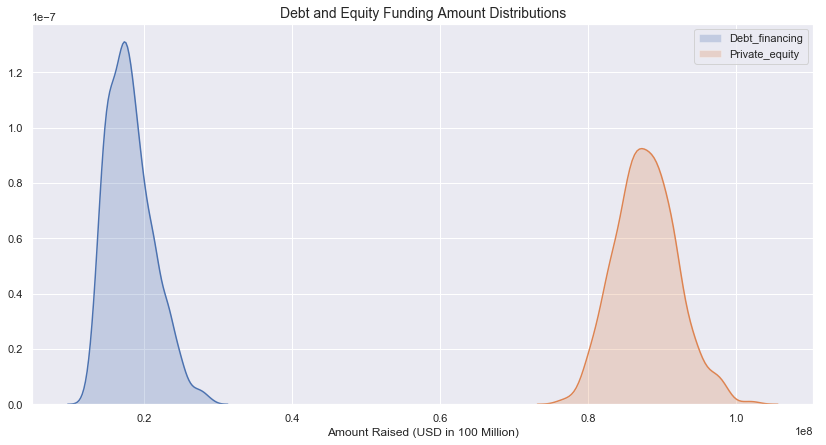

In [21]:
#Define Values
other_round1_list = ['debt_financing', 'private_equity']

#Plot
bootstrap_plot('Debt and Equity Funding Amount Distributions','Amount Raised (USD in 100 Million)', other_round1_list, investment_data, 'raised_amount_usd', 'funding_round_type')

### Observations:
- <strong>Private Equity</strong> is typically <strong>greater than</strong> Debt Financing

## Bootstrap Confidence Intervals:  Product vs Equity Crowdfunding Distributions

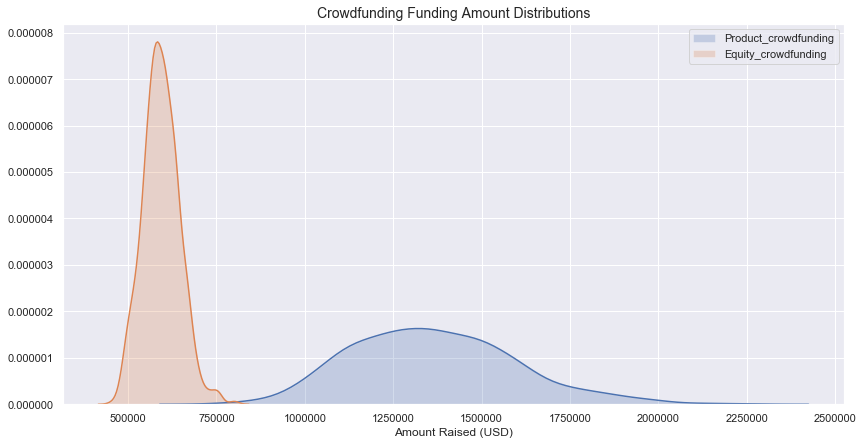

In [22]:
#Define Values
other_round2_list = ['product_crowdfunding', 'equity_crowdfunding']

#Plot
bootstrap_plot('Crowdfunding Funding Amount Distributions','Amount Raised (USD)', other_round2_list, investment_data, 'raised_amount_usd', 'funding_round_type')

### Observations:
- <strong>Product Crowdfunding</strong> is <strong>Usually Raises More</strong> than Equity Crowdfunding
- <strong>Product Crowdfunding</strong> has a <strong>Higher Variance</strong> than Equity Crowdfunding


### Bootstrap Confidence Intervals:  Other Distributions

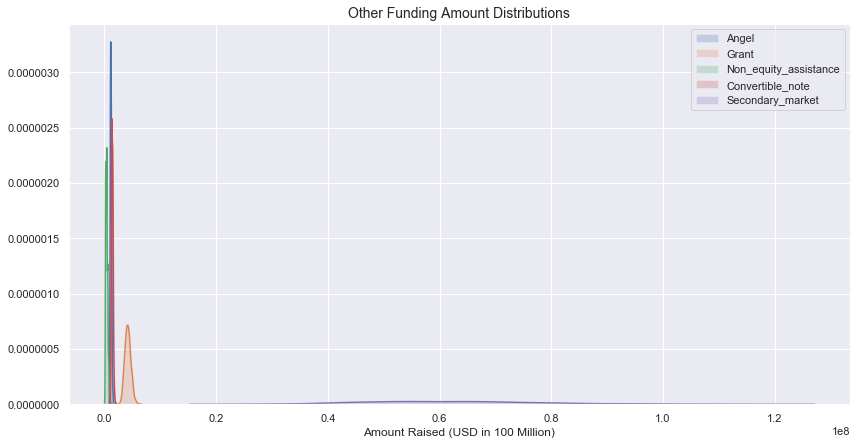

In [23]:
#Define Values
other_round3_list = ['angel','grant','non_equity_assistance','convertible_note','secondary_market']

#Plot
bootstrap_plot('Other Funding Amount Distributions','Amount Raised (USD in 100 Million)', other_round3_list, investment_data, 'raised_amount_usd', 'funding_round_type')

### Observations:
- <strong>Secondary Market</strong> is <strong>Broad</strong> and has <strong>Large Variance</strong>
- <strong>Non-Equity Assistance and Convertible Notes similar to Angel</strong>
- <strong>Grants</strong> are typically <strong>Larger amounts with higher variance</strong>

## Overall Observations:


### Key Takeaways:
- <strong>Amount Funded by Angels Varies Much More than Amount Funded by Seeds.</strong>
- <strong>Larger funding amounts typically have higher variances.</strong>
- <strong>Equity</strong> is <strong>Greater Than Debt before IPOs</strong> but <strong>Less After IPOs</strong>.

# Exploration 2: Do Different Round Types Have Different Tenures?

In [24]:
# Group Funding Round by Min Company Tenure to get Comapny Tenure at Time Round was Raised
round_raised_tenure = crunchbase_df.groupby('funding_round_permalink')[['funding_round_type','funding_round_code','tenure_quarters_overall']].min()

# Group Funding Round by Max Round Tenure to get Round Length of Round
round_length_tenure = crunchbase_df.groupby('funding_round_permalink')[['funding_round_type','funding_round_code','tenure_quarters_round']].max()

## a) Seed vs Angel Tenures

### Company Tenure When Raised

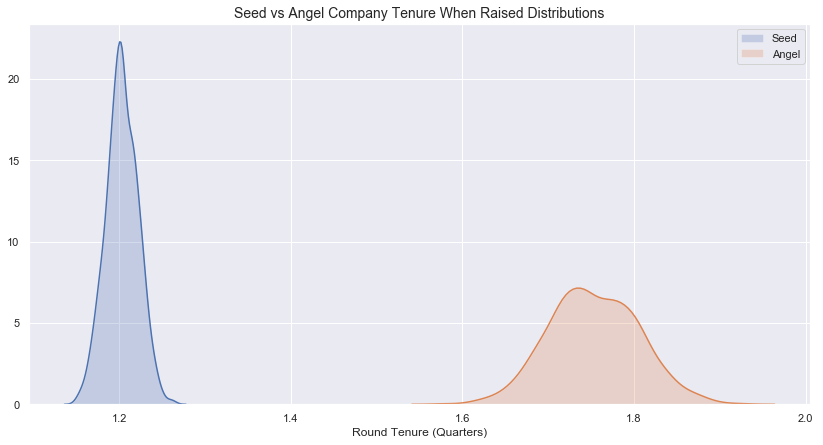

In [25]:
#Plot
bootstrap_plot('Seed vs Angel Company Tenure When Raised Distributions', 'Round Tenure (Quarters)', angel_seed_list, round_raised_tenure, 'tenure_quarters_overall', 'funding_round_type')

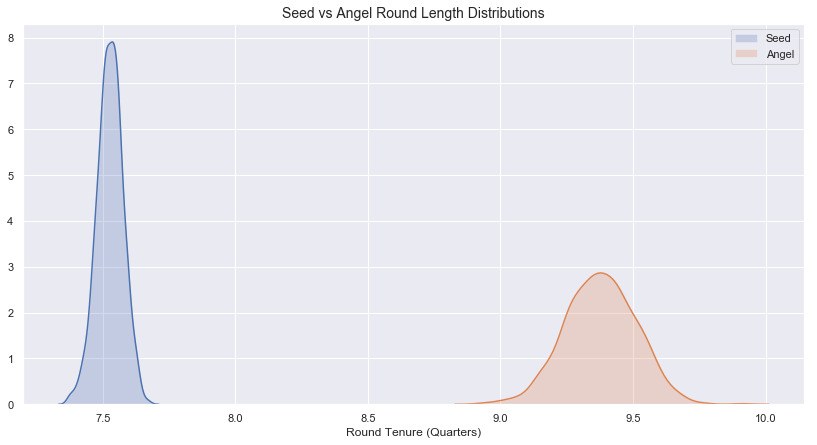

In [26]:
# Plot
bootstrap_plot('Seed vs Angel Round Length Distributions', 'Round Tenure (Quarters)', angel_seed_list, round_length_tenure, 'tenure_quarters_round', 'funding_round_type')

### Observations:
- <strong>Angel Investments</strong> are usually <strong>raised later</strong> and <strong>typically last longer</strong>.  
- That being said previous exploration found that they usually get more capital as well.
- <strong>Angel</strong> Tenure and Length both have higher variance.

## b) Venture Round Tenures 

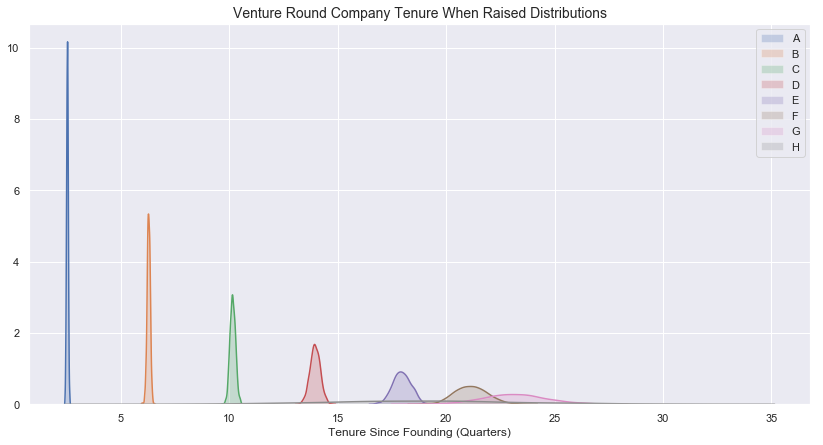

In [27]:
#Plot
bootstrap_plot('Venture Round Company Tenure When Raised Distributions', 'Tenure Since Founding (Quarters)', venture_round_list, round_raised_tenure, 'tenure_quarters_overall', 'funding_round_code')

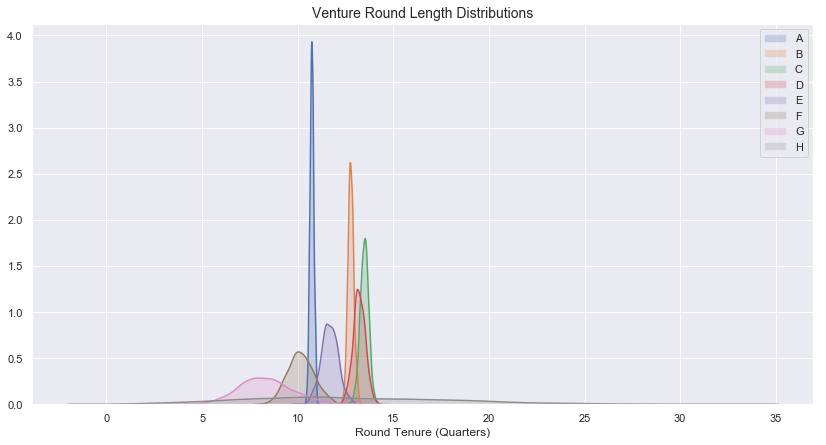

In [28]:
#Plot
bootstrap_plot('Venture Round Length Distributions', 'Round Tenure (Quarters)', venture_round_list, round_length_tenure, 'tenure_quarters_round', 'funding_round_code')

### Observations:
- <strong>After Series D Company Tenure and Rounds Raise Start To Be Less Defined.</strong>
- <strong>Round Lengths All Cluster around 10-15 Quarters For Series A-F</strong>
- <strong>Series G and H Have less Data</strong> as they are relatively new kinds of funding so this may explain why they vary so much and are shorter than other Series.